In [1]:
import numpy as np

# Parameters
n, p = 50, 40  # Dimensions of the matrix
noise_std = 0.1  # Standard deviation of the homoscedastic noise

# Generate two random vectors
u = np.random.rand(n)  # Vector of length n
v = np.random.rand(p)  # Vector of length p

# Create a rank-1 matrix as the outer product of u and v
rank_1_matrix = np.outer(u, v)

# Add homoscedastic Gaussian noise (constant variance across the matrix)
noise = np.random.normal(0, noise_std, size=(n, p))
noisy_matrix = rank_1_matrix + noise
 
# Print the original and noisy matrix
print("Rank-1 Matrix (Outer Product):")
print(rank_1_matrix)
print("\nNoisy Matrix (with Homoscedastic Noise):")
print(noisy_matrix)


Rank-1 Matrix (Outer Product):
[[0.17949151 0.95374408 0.39176641 ... 0.68037931 0.72760802 0.10333729]
 [0.14237863 0.75654149 0.31076213 ... 0.53969947 0.57716285 0.08197057]
 [0.11068969 0.58815949 0.24159639 ... 0.41957959 0.44870482 0.06372654]
 ...
 [0.08753548 0.46512754 0.19105895 ... 0.3318114  0.35484417 0.05039614]
 [0.06143884 0.32646073 0.13409923 ... 0.23288965 0.24905575 0.03537172]
 [0.16641377 0.88425436 0.36322234 ... 0.63080693 0.67459456 0.09580814]]

Noisy Matrix (with Homoscedastic Noise):
[[ 0.09606327  1.02287905  0.53068015 ...  0.64973371  0.76458492
   0.20179852]
 [ 0.22237064  0.85331497  0.44053283 ...  0.56930742  0.47493731
   0.14194847]
 [ 0.15223302  0.54648441  0.20451839 ...  0.51052779  0.62460123
   0.08465129]
 ...
 [ 0.08372122  0.45842671  0.36583588 ...  0.3361221   0.46548687
  -0.125604  ]
 [ 0.08838072  0.25043863  0.0672055  ...  0.30478357  0.42313799
   0.02593987]
 [ 0.24436495  0.86035781  0.38025747 ...  0.60290378  0.56232313
   0.12

In [2]:
import sys
import os
import matplotlib.pyplot as plt

# Add the path to utils.py
sys.path.append(r"c:\Document\Serieux\Travail\python_work\cEBNM_torch\py")
from cEBMF import *

In [3]:
mycebmf= cEBMF(data= noisy_matrix)
K=5
# Perform udv_si transformation
U, s, Vt = np.linalg.svd(noisy_matrix, full_matrices=False)

 
mycebmf

In [4]:
K = np.min([K, U.shape[1]])
print(K)

5


In [5]:
mycebmf.init_LF()
print(mycebmf.L[:,1])
print(mycebmf.F[:,1])


The array does not contain any missing values.
[ 0.00882207  0.08398282 -0.13366949 -0.02628325 -0.06068981 -0.07678791
 -0.12513896 -0.03459896 -0.17745053  0.15667094 -0.01680563 -0.12483494
  0.0707236  -0.07087619  0.19660294  0.19851277 -0.27541243 -0.14173961
 -0.02945374 -0.04255019  0.21290152 -0.15440598  0.07714458 -0.10680387
  0.35952166  0.07856986  0.10357703  0.39731472  0.08407457 -0.01155515
  0.01080567 -0.09386072  0.03979643 -0.03626444  0.26358823  0.13254127
  0.13742975  0.19859066 -0.14151605 -0.40470855 -0.04600331 -0.46926211
  0.06762188  0.18413955 -0.17933192 -0.09755479 -0.18430267 -0.36237532
  0.00796831  0.05878277]
[ 0.0073144  -0.02668553  0.0905337   0.07608862 -0.02462159 -0.02824996
  0.08492208 -0.10599018  0.22167518 -0.17052646 -0.14692445 -0.21761278
  0.16664414  0.08506465 -0.0562362  -0.03509608  0.11046694  0.20416767
 -0.02587774  0.18116385 -0.15570454  0.20162694  0.15665227 -0.16894953
  0.17090516 -0.12544333 -0.09332267  0.24180575 -0

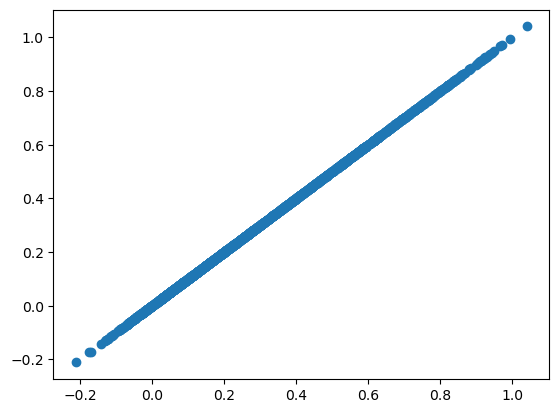

In [6]:
mycebmf.update_fitted_val()
U_k = U[:, :K]
D_k = np.diag(s[:K])
V_k = Vt[:K, :]
L = np.matmul(U_k,  D_k)
F =V_k.T
 
plt.scatter(mycebmf.Y_fit , np.sum( [np.outer(    L[:, k]  ,   F[:, k]    ) for k in range(  K)], axis=0) )

check partial residual is good, seems fine

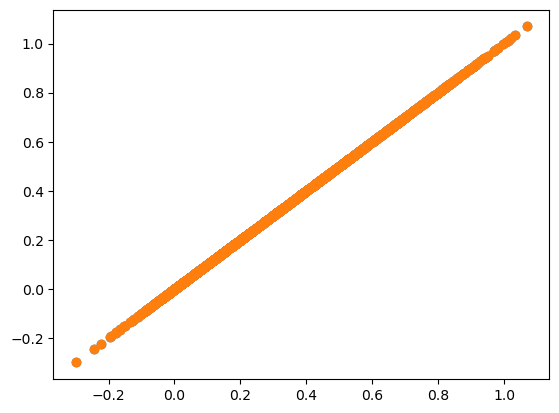

In [7]:
mycebmf.cal_partial_residuals(k=0)
mycebmf.update_fitted_val()
idx_loop = set(range(5))-{0}
Rk= noisy_matrix-np.sum( [np.outer(  mycebmf.L[:, j]  ,  mycebmf.F[:, j]    ) for j in  idx_loop], axis=0)
plt.scatter (mycebmf.Rk, Rk)
plt.scatter( mycebmf.Rk, 
            noisy_matrix- np.sum( [np.outer(    L[:, k]  ,   F[:, k]    ) for k in set(range(  K))-{0}], axis=0)
            )

check if update works

In [8]:
mycebmf.update_tau()
mycebmf.tau

array([[142.51740895, 142.51740895, 142.51740895, ..., 142.51740895,
        142.51740895, 142.51740895],
       [142.51740895, 142.51740895, 142.51740895, ..., 142.51740895,
        142.51740895, 142.51740895],
       [142.51740895, 142.51740895, 142.51740895, ..., 142.51740895,
        142.51740895, 142.51740895],
       ...,
       [142.51740895, 142.51740895, 142.51740895, ..., 142.51740895,
        142.51740895, 142.51740895],
       [142.51740895, 142.51740895, 142.51740895, ..., 142.51740895,
        142.51740895, 142.51740895],
       [142.51740895, 142.51740895, 142.51740895, ..., 142.51740895,
        142.51740895, 142.51740895]])

In [9]:
print(mycebmf.prior_F
      )

mycebmf.update_loading_factor_k(k=0)

norm


In [10]:
k=0

mycebmf.cal_partial_residuals(k=k)
compute_hat_l_and_s_l(Z = mycebmf.Rk,
                                                            nu = mycebmf.F[:,k] ,
                                                            omega= mycebmf.F2[:,k], 
                                                            tau= mycebmf.tau  )
compute_hat_f_and_s_f(Z = mycebmf.Rk,
                                                            nu = mycebmf.L[:,k] ,
                                                            omega= mycebmf.L2[:,k], 
                                                            tau= mycebmf.tau  )
 

(array([-0.05319147, -0.26131234, -0.11244671, -0.03355759, -0.20669947,
        -0.0189717 , -0.12414784, -0.27062763, -0.16144768, -0.16663049,
        -0.21787786, -0.09926986, -0.19514974, -0.05963225, -0.00323578,
        -0.19808265, -0.20952944, -0.24760703, -0.08524994, -0.1565157 ,
        -0.02520121, -0.04139975, -0.0810909 , -0.24615192, -0.21561018,
        -0.23234919, -0.0968628 , -0.01127354, -0.23195703, -0.03237666,
        -0.03637209, -0.09685428, -0.17232412, -0.13480482, -0.16310084,
        -0.23488206, -0.00390215, -0.18667157, -0.20919806, -0.02910038]),
 array([0.00485881, 0.00485881, 0.00485881, 0.00485881, 0.00485881,
        0.00485881, 0.00485881, 0.00485881, 0.00485881, 0.00485881,
        0.00485881, 0.00485881, 0.00485881, 0.00485881, 0.00485881,
        0.00485881, 0.00485881, 0.00485881, 0.00485881, 0.00485881,
        0.00485881, 0.00485881, 0.00485881, 0.00485881, 0.00485881,
        0.00485881, 0.00485881, 0.00485881, 0.00485881, 0.00485881,
      

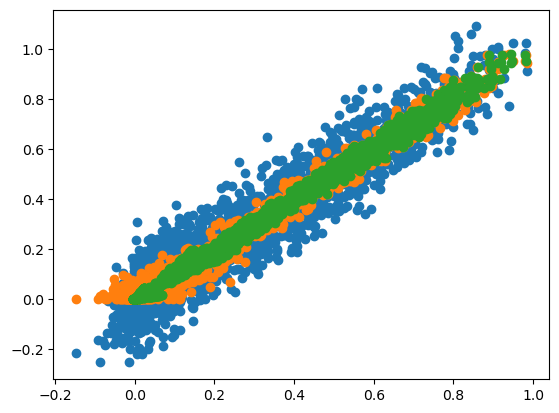

In [11]:
mycebmf.iter()
mycebmf.update_fitted_val()
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)
plt.scatter(np.outer(mycebmf.L[:,0],mycebmf.F[:,0] ), rank_1_matrix)


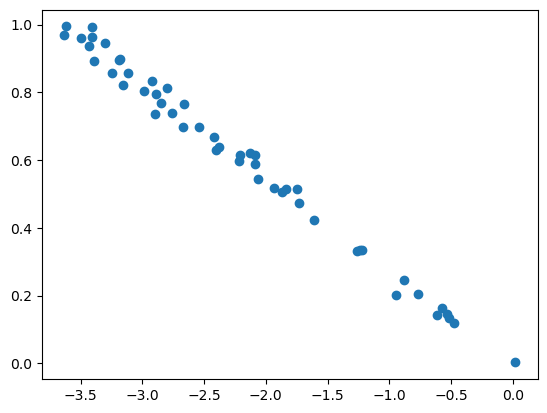

In [12]:
plt.scatter(mycebmf.L[:,0], u)

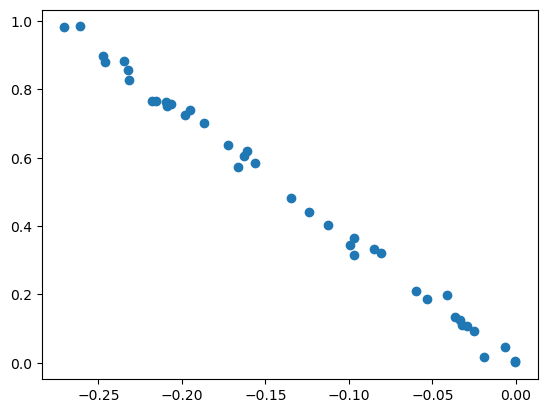

In [13]:
plt.scatter(mycebmf.F[:,0], v)

In [14]:
mycebmf.L[:,1]

array([ 0.00104054,  0.01602884, -0.04278007, -0.00382364, -0.01019658,
       -0.01442086, -0.03671378, -0.0050241 , -0.08888664,  0.06226095,
       -0.00242728, -0.03632485,  0.01213071, -0.01263623,  0.11594498,
        0.11814516, -0.23249089, -0.04908539, -0.00431581, -0.00653651,
        0.14098029, -0.06221605,  0.01403125, -0.02591173,  0.31617647,
        0.01439829,  0.02346377,  0.35063074,  0.01601104, -0.00163095,
        0.00134907, -0.02024374,  0.0057298 , -0.00529958,  0.21662045,
        0.04123595,  0.04471273,  0.11940912, -0.04926119, -0.35809901,
       -0.0070988 , -0.41575978,  0.01138419,  0.09749974, -0.09168359,
       -0.02147246, -0.09970389, -0.32017423,  0.00102781,  0.00931778])

In [15]:
for i in range(40):
    mycebmf.iter()

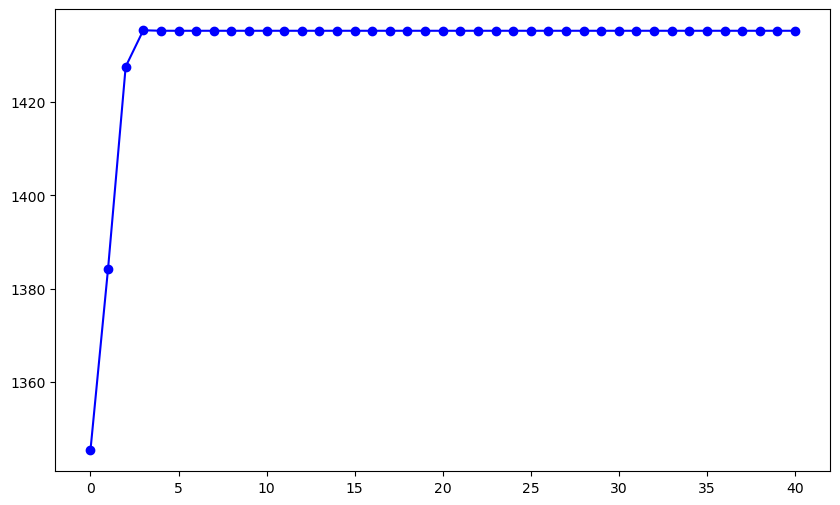

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(np.array(mycebmf.obj)[1:], marker='o', linestyle='-', color='b')

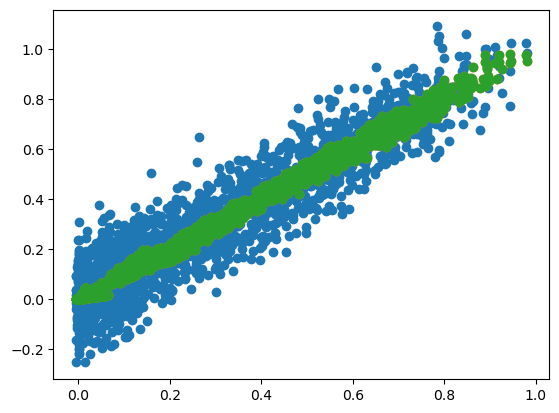

In [17]:
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix) 
plt.scatter(np.outer(mycebmf.L[:,0],mycebmf.F[:,0] ), rank_1_matrix)

In [18]:
mycebmf.L
 

array([[-3.63940607e+000,  3.89352955e-310, -1.99731349e-309,
        -5.27168005e-309,  3.39277314e-306],
       [-2.85450075e+000,  3.68077328e-309,  1.51577843e-308,
        -1.85188639e-308,  4.46347355e-305],
       [-2.21877302e+000, -4.99582342e-309,  9.85920924e-308,
         1.77354073e-308, -1.88823053e-305],
       [-2.67809676e+000, -5.73017599e-310,  7.89083803e-308,
        -1.88893573e-309,  2.15021350e-305],
       [-3.16342352e+000, -2.06131335e-309,  7.40312735e-308,
         1.73840194e-309,  3.82821112e-306],
       [-3.41270880e+000, -3.81686792e-309, -9.08971890e-308,
         2.00179281e-308, -7.27184166e-305],
       [-2.90803410e+000, -5.29301429e-309, -3.01269671e-309,
         1.70194765e-308, -5.77866533e-305],
       [-5.78763973e-001, -8.92559098e-310,  8.93608338e-308,
         1.24752863e-308,  2.21299818e-305],
       [ 1.89272667e-002, -6.73855345e-309,  1.22492288e-307,
         1.27841340e-308, -2.93347634e-305],
       [-3.50089797e+000,  6.31333155